In [216]:
import pandas as pd
import numpy as np

In [217]:
grk_df = pd.read_csv("../data/greeks.csv")
fnd_df = pd.read_csv("../data/founding.csv")

grk_df.drop(grk_df[grk_df["year"] != 2020].index, inplace=True)
grk_df["name"] = grk_df["greek_name"]

print(grk_df.head())
print()
print(fnd_df.head())

df = fnd_df.merge(grk_df[["name", "size"]], on="name")
df = df.sort_values(by="size", ascending=False)
df

   year inits greek_name council  actives  nm  size   gpa  serv_hrs name
0  2020   ACO        AXΩ      PH       61  51   112  3.36     828.0  AXΩ
1  2020    AP         AΦ      PH       70  61   131  3.14    1942.0   AΦ
2  2020   ATO        ATΩ     IFC       22   5    27  3.46     433.0  ATΩ
3  2020   BTP        BΘΠ     IFC       71  21    92  3.55     150.0  BΘΠ
4  2020    CO         XΩ      PH      104  54   158  3.41     914.0   XΩ

  name  found_year
0   ΣX        1908
1   ΣN        1924
2  ΠKA        1927
3   KΣ        1928
4  BΘΠ        1913


,name,found_year,size
0,ΣX,1908,131
10,ΣΦE,1950,106
8,ΦΔT,1914,98
4,BΘΠ,1913,92
1,ΣN,1924,65
3,KΣ,1928,60
2,ΠKA,1927,54
5,ATΩ,2018,27
6,TRI,2013,22
9,ΔΣΦ,2014,22


In [218]:
obf = [f"House {chr(ord('A') + i)}" for i in range(len(df))]
obf[obf.index("House I")] = "Triangle"

df["name"] = obf
df

,name,found_year,size
0,House A,1908,131
10,House B,1950,106
8,House C,1914,98
4,House D,1913,92
1,House E,1924,65
3,House F,1928,60
2,House G,1927,54
5,House H,2018,27
6,Triangle,2013,22
9,House J,2014,22


In [219]:
df.dropna(inplace=True)
df["found_year"] = df["found_year"].astype(int)
df

,name,found_year,size
0,House A,1908,131
10,House B,1950,106
8,House C,1914,98
4,House D,1913,92
1,House E,1924,65
3,House F,1928,60
2,House G,1927,54
5,House H,2018,27
6,Triangle,2013,22
9,House J,2014,22


In [220]:
df["gt_med"] = (df["size"] > df["size"].median()).astype(int)
df["gt_med"] = ((df["gt_med"] - 0.5) * 2).astype(int)
df

,name,found_year,size,gt_med
0,House A,1908,131,1
10,House B,1950,106,1
8,House C,1914,98,1
4,House D,1913,92,1
1,House E,1924,65,1
3,House F,1928,60,-1
2,House G,1927,54,-1
5,House H,2018,27,-1
6,Triangle,2013,22,-1
9,House J,2014,22,-1


In [221]:
df["level"] = (df.sort_values("found_year")["gt_med"] *
               np.array([1 + (i % 3) for i in range(len(df))]))

df["level"] = df["level"].astype(float)


# Newer houses are bunched together, so it's best to handle their modifications
# by hand.
df.set_index("name", inplace=True)
df.at["Triangle", "level"] = -1
df.at["House J", "level"] = -1.5
df.at["House K", "level"] = -2
df.at["House H", "level"] = -2.5

df

,found_year,size,gt_med,level
name,,,,
House A,1908,131,1,1
House B,1950,106,1,1
House C,1914,98,1,3
House D,1913,92,1,2
House E,1924,65,1,1
House F,1928,60,-1,-3
House G,1927,54,-1,-2
House H,2018,27,-1,-2
Triangle,2013,22,-1,-1


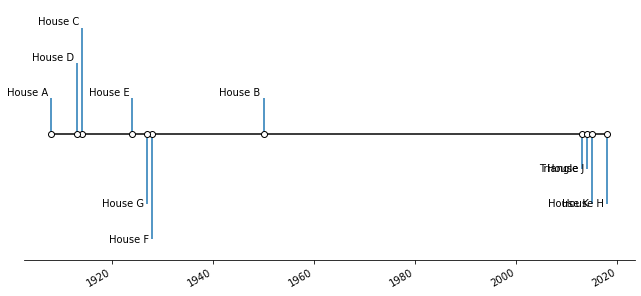

In [222]:
import matplotlib.pyplot as plt

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)

colors = df["gt_med"].map({
    1: "#AAAAAA",
    -1: "#CC0000"
})

markerline, stemline, baseline = ax.stem(
    df.found_year, df.level,
    linefmt="C0-",
    basefmt="k-",
    use_line_collection=True
)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(df)))

# annotate lines
vert = np.array(['top', 'bottom'])[(df.level > 0).astype(int)]
for d, l, r in zip(
    df.found_year,
    df.level,
    df.index
):
    ax.annotate(
        r,
        xy=(d, l),
        xytext=(-3, np.sign(l)*3),
        textcoords="offset points",
#         va=va,
        ha="right"
    )

# format xaxis with 4 month intervals
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.savefig("../output/timeline.png", dpi=500)
plt.show()